**20BEC1131**
*DAC Task 1 - Regression Problem - Apple Stocks*
*Model Building*

In [70]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import math
import pickle

In [5]:
#reading data
dat1 = pd.read_csv("..\data\\apple_final_train.csv")
dat2 = pd.read_csv("..\data\\apple_final_test.csv")

In [6]:
dat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 0 to 1409
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Open                         1410 non-null   float64
 1   High                         1410 non-null   float64
 2   Low                          1410 non-null   float64
 3   Close                        1410 non-null   float64
 4   Adjusted Closing Amount      1410 non-null   float64
 5   Volume Traded (in Millions)  1410 non-null   float64
dtypes: float64(6)
memory usage: 66.2 KB


**Linear Regression**

In [17]:
#creating variable data lists
op = np.array(dat1["Open"]).reshape(-1,1)
hi = np.array(dat1["High"]).reshape(-1,1)
vol = np.array(dat1["Volume Traded (in Millions)"]).reshape(-1,1)

In [18]:
#Train the Models
model1 = LinearRegression()
model1.fit(op, hi)
model2 = LinearRegression()
model2.fit(hi, vol)

LinearRegression()

In [19]:
# Predicting
high_predicted = model1.predict(op)
vol_predict = model2.predict(hi)

Text(0, 0.5, 'High Price (daily)')

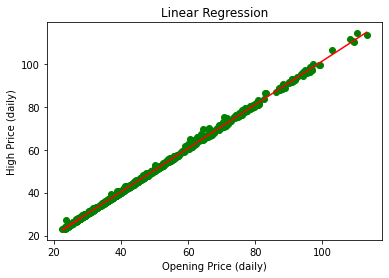

In [20]:
#Linear Regression of Opening price and Highest Price
plt.scatter(op, hi, color="green")
plt.plot(op, high_predicted, color="red")
plt.title("Linear Regression")
plt.xlabel("Opening Price (daily)")
plt.ylabel("High Price (daily)")

Text(0, 0.5, 'Volume traded in millions (daily)')

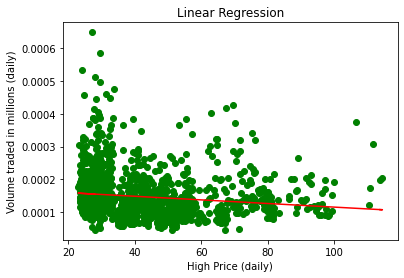

In [21]:
#Linear regression of highest price to volume traded in millions
plt.scatter(hi, vol, color="green")
plt.plot(hi, vol_predict, color="red")
plt.title("Linear Regression")
plt.xlabel("High Price (daily)")
plt.ylabel("Volume traded in millions (daily)")

In [27]:
#accuracy
print("MSE 1",mean_squared_error(hi,high_predicted))
print("MSE 1",mean_squared_error(vol,vol_predict))
r2_1 = r2_score(hi, high_predicted)
r2_2 = r2_score(vol, vol_predict)
print("R2 score of model1: {0}, R2 score of model2: {1}".format(r2_1, r2_2))

MSE 1 0.2229825195598899
MSE 1 5.122255592892045e-09
R2 score of model1: 0.9992345917631661, R2 score of model2: 0.017044594890784026


**Support Vector Regression**

In [30]:
#scaling and transforming data size
sc_x = StandardScaler()
sc_y = StandardScaler()
op1 = sc_x.fit_transform(op)
hi1 = sc_y.fit_transform(hi)

In [66]:
#fitting SVR into dataset
svregressor = SVR(kernel = 'rbf')
svregressor.fit(op1, hi1.ravel())

SVR()

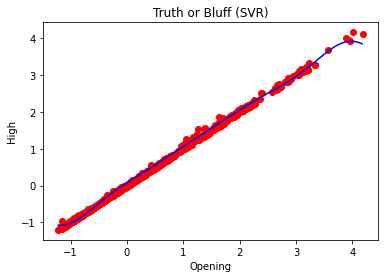

In [67]:
#visualization
X_grid = np.arange(min(op1), max(op1), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(op1, hi1, color = 'red')
plt.plot(X_grid, svregressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Opening')
plt.ylabel('High')
plt.show()

*We can see that the SVM is slightly better than Linear Regression*

In [71]:
#exporting model
with open('../models/model.pkl', 'wb') as final_model:
    pickle.dump(svregressor, final_model)